In [195]:
# Let's start by importing all of the libraries we'll need for our analyses

import pandas as pd

import geopandas as gpd

from shapely.geometry import Point

import contextily as ctx

import matplotlib.pyplot as plt

# for interactive plots
import plotly.express as px

import plotly.graph_objects as go

# for network analysis
import networkx as nx

# for street network analysis
import osmnx as ox

In [10]:
pd.set_option('display.max_columns', None)

In [115]:
df = gpd.read_file('stn_reg_dropna.geojson')

In [116]:
df.shape

(212, 44)

In [117]:
df.head()

,FIPS,Census Tract,11 Total Population,11 Total Foreign Born,11 Total Entered 2000 or later,11 Europe,11 Europe Entered 2000 or later,11 Asia,11 Asia Entered 2000 or later,11 Latin America,11 Caribbean,11 Caribbean Entered 2000 or later,11 Central America,11 Mexico,11 Mexico Entered 2000 or later,11 Other Central America,11 Other Central America 2000 or later,11 South America,11 South America Entered 2000 or later,11 Other areas,11 Other areas Entered 2000 or later,19 Total Population,19 Total Foreign Born,19 Total Entered 2010 or later,19 Europe,19 Europe Entered 2010 or later,19 Asia,19 Asia Entered 2010 or later,19 Latin America,19 Caribbean,19 Caribbean entered 2010 or later,19 Central America,19 Mexico,19 Mexico Entered 2010 or later,19 Other Central America,19 Other Central America Entered 2010 or later,19 South America,19 South America Entered 2010 or later,19 Other Areas,19 Other Areas Entered 2010 or later,% Change Foreign Born,region,station,geometry
0,06037181000,"Census Tract 1810, Los Angeles, CA",6574.0,2172.0,161.0,88.0,0.0,1039.0,137.0,941.0,33.0,0.0,545.0,360.0,7.0,185.0,17.0,363.0,0.0,104.0,0.0,6458.0,1774.0,155.0,155.0,0.0,1081.0,85.0,523.0,47.0,0.0,363.0,264.0,70.0,99.0,0.0,113.0,0.0,15.0,0.0,-5.569441,NELA,None,"MULTIPOLYGON (((-118.22860 34.14689, -118.2285..."
1,06037181300,"Census Tract 1813, Los Angeles, CA",3860.0,1428.0,188.0,77.0,8.0,845.0,144.0,491.0,77.0,0.0,244.0,165.0,35.0,79.0,0.0,170.0,0.0,15.0,1.0,4059.0,1328.0,181.0,86.0,0.0,905.0,181.0,280.0,16.0,0.0,221.0,144.0,0.0,77.0,0.0,43.0,0.0,57.0,0.0,-4.277401,NELA,None,"MULTIPOLYGON (((-118.22942 34.13411, -118.2294..."
2,06037181400,"Census Tract 1814, Los Angeles, CA",4832.0,2026.0,625.0,89.0,9.0,1160.0,303.0,775.0,0.0,0.0,679.0,326.0,47.0,353.0,227.0,96.0,39.0,2.0,0.0,4943.0,2029.0,282.0,37.0,0.0,1326.0,149.0,620.0,75.0,68.0,395.0,329.0,0.0,66.0,0.0,150.0,40.0,46.0,25.0,-0.880861,NELA,None,"MULTIPOLYGON (((-118.21897 34.14000, -118.2173..."
3,06037181500,"Census Tract 1815, Los Angeles, CA",4035.0,1683.0,183.0,113.0,30.0,806.0,101.0,762.0,125.0,0.0,637.0,271.0,0.0,366.0,52.0,0.0,0.0,2.0,0.0,3956.0,1234.0,90.0,36.0,0.0,564.0,90.0,615.0,12.0,0.0,481.0,204.0,0.0,277.0,0.0,122.0,0.0,19.0,0.0,-10.516913,NELA,None,"MULTIPOLYGON (((-118.20153 34.13351, -118.2015..."
4,06037181600,"Census Tract 1816, Los Angeles, CA",4425.0,1125.0,278.0,49.0,27.0,369.0,154.0,675.0,16.0,0.0,606.0,227.0,18.0,379.0,26.0,53.0,53.0,32.0,0.0,4631.0,1291.0,168.0,81.0,44.0,723.0,96.0,423.0,19.0,0.0,360.0,234.0,0.0,126.0,0.0,44.0,11.0,64.0,17.0,2.453619,NELA,None,"MULTIPOLYGON (((-118.21828 34.13188, -118.2181..."


In [14]:
ctk = ['station', '% Change Foreign Born']

In [118]:
elacc = df[df["station"].isin(['East LA Civic Center']
)
            ]

elacc.reset_index()

elacc = elacc.append(elacc.sum(numeric_only=True), ignore_index=True)

elacc.iloc[-1, elacc.columns.get_loc('station')] = "East LA Civic Center"

elacc = elacc.iloc[-1:]

elacc['% Change Foreign Born'] = ((elacc['19 Total Foreign Born'] / elacc['19 Total Population']) - (elacc['11 Total Foreign Born'] / elacc['11 Total Population']))*100

elacc = elacc[ctk]

elacc.head()



,station,% Change Foreign Born
8,East LA Civic Center,-4.862695


In [16]:
eastla = df[df["station"].isin(['East LA']
)
            ]

eastla.reset_index()

eastla = eastla.append(eastla.sum(numeric_only=True), ignore_index=True)

eastla.iloc[-1, eastla.columns.get_loc('station')] = "East LA"

eastla = eastla.iloc[-1:]

eastla['% Change Foreign Born'] = ((eastla['19 Total Foreign Born'] / eastla['19 Total Population']) - (eastla['11 Total Foreign Born'] / eastla['11 Total Population']))*100

eastla = eastla[ctk]

eastla.head()



,station,% Change Foreign Born
14,East LA,0.432542


In [17]:
mplaza = df[df["station"].isin(['Mariachi']
)
            ]

mplaza.reset_index()

mplaza = mplaza.append(mplaza.sum(numeric_only=True), ignore_index=True)

mplaza.iloc[-1, mplaza.columns.get_loc('station')] = "Mariachi"

mplaza = mplaza.iloc[-1:]

mplaza['% Change Foreign Born'] = ((mplaza['19 Total Foreign Born'] / mplaza['19 Total Population']) - (mplaza['11 Total Foreign Born'] / mplaza['11 Total Population']))*100

mplaza = mplaza[ctk]

mplaza.head()

,station,% Change Foreign Born
7,Mariachi,-5.466961


In [18]:
cela = df[df["station"].isin(['Central East LA']
)
            ]

cela.reset_index()

cela = cela.append(cela.sum(numeric_only=True), ignore_index=True)

cela.iloc[-1, cela.columns.get_loc('station')] = "Central East LA"

cela = cela.iloc[-1:]

cela['% Change Foreign Born'] = ((cela['19 Total Foreign Born'] / cela['19 Total Population']) - (cela['11 Total Foreign Born'] / cela['11 Total Population']))*100

cela = cela[ctk]

cela.head()




,station,% Change Foreign Born
43,Central East LA,-4.772682


In [19]:
ctown = df[df["station"].isin(['Chinatown']
)
            ]

ctown.reset_index()

ctown = ctown.append(ctown.sum(numeric_only=True), ignore_index=True)

ctown.iloc[-1, ctown.columns.get_loc('station')] = "Chinatown"

ctown = ctown.iloc[-1:]

ctown['% Change Foreign Born'] = ((ctown['19 Total Foreign Born'] / ctown['19 Total Population']) - (ctown['11 Total Foreign Born'] / ctown['11 Total Population']))*100

ctown = ctown[ctk]

ctown.head()



,station,% Change Foreign Born
4,Chinatown,-7.64756


In [20]:
cla = df[df["station"].isin(['Central LA']
)
            ]

cla.reset_index()

cla = cla.append(cla.sum(numeric_only=True), ignore_index=True)

cla.iloc[-1, cla.columns.get_loc('station')] = "Central LA"

cla = cla.iloc[-1:]

cla['% Change Foreign Born'] = ((cla['19 Total Foreign Born'] / cla['19 Total Population']) - (cla['11 Total Foreign Born'] / cla['11 Total Population']))*100

cla = cla[ctk]

cla.head()



,station,% Change Foreign Born
16,Central LA,-7.293661


In [21]:
heritage = df[df["station"].isin(['Heritage']
)
            ]

heritage.reset_index()

heritage = heritage.append(heritage.sum(numeric_only=True), ignore_index=True)

heritage.iloc[-1, heritage.columns.get_loc('station')] = "Heritage"

heritage = heritage.iloc[-1:]

heritage['% Change Foreign Born'] = ((heritage['19 Total Foreign Born'] / heritage['19 Total Population']) - (heritage['11 Total Foreign Born'] / heritage['11 Total Population']))*100

heritage = heritage[ctk]

heritage.head()



,station,% Change Foreign Born
5,Heritage,-2.705435


In [22]:
hlp = df[df["station"].isin(["Highland Park"]
)
            ]

hlp.reset_index()

hlp = hlp.append(hlp.sum(numeric_only=True), ignore_index=True)

hlp.iloc[-1, hlp.columns.get_loc('station')] = "Highland Park"

hlp = hlp.iloc[-1:]

hlp['% Change Foreign Born'] = ((hlp['19 Total Foreign Born'] / hlp['19 Total Population']) - (hlp['11 Total Foreign Born'] / hlp['11 Total Population']))*100

hlp = hlp[ctk]

hlp.head()



,station,% Change Foreign Born
8,Highland Park,-7.117768


In [23]:
NELA = df[df["station"].isin(['NELA']
)
            ]

NELA.reset_index()

NELA = NELA.append(NELA.sum(numeric_only=True), ignore_index=True)

NELA.iloc[-1, NELA.columns.get_loc('station')] = "NELA"

NELA = NELA.iloc[-1:]

NELA['% Change Foreign Born'] = ((NELA['19 Total Foreign Born'] / NELA['19 Total Population']) - (NELA['11 Total Foreign Born'] / NELA['11 Total Population']))*100

NELA = NELA[ctk]

NELA.head()



,station,% Change Foreign Born
44,NELA,-4.763858


In [24]:
dmar = df[df["station"].isin(["Del Mar"]
)
            ]

dmar.reset_index()

dmar = dmar.append(dmar.sum(numeric_only=True), ignore_index=True)

dmar.iloc[-1, dmar.columns.get_loc('station')] = "Del Mar"

dmar = dmar.iloc[-1:]

dmar['% Change Foreign Born'] = ((dmar['19 Total Foreign Born'] / dmar['19 Total Population']) - (dmar['11 Total Foreign Born'] / dmar['11 Total Population']))*100

dmar = dmar[ctk]

dmar.head()



,station,% Change Foreign Born
3,Del Mar,2.267495


In [25]:
pas = df[df["station"].isin(["Pasadena"]
)
            ]

pas.reset_index()

pas = pas.append(pas.sum(numeric_only=True), ignore_index=True)

pas.iloc[-1, pas.columns.get_loc('station')] = "Pasadena"

pas = pas.iloc[-1:]

pas['% Change Foreign Born'] = ((pas['19 Total Foreign Born'] / pas['19 Total Population']) - (pas['11 Total Foreign Born'] / pas['11 Total Population']))*100

pas = pas[ctk]

pas.head()


,station,% Change Foreign Born
30,Pasadena,-1.801995


In [26]:
arc = df[df["station"].isin(["Arcadia"]
)
            ]

arc.reset_index()

arc = arc.append(arc.sum(numeric_only=True), ignore_index=True)

arc.iloc[-1, arc.columns.get_loc('station')] = "Arcadia"

arc = arc.iloc[-1:]

arc['% Change Foreign Born'] = ((arc['19 Total Foreign Born'] / arc['19 Total Population']) - (arc['11 Total Foreign Born'] / arc['11 Total Population']))*100

arc = arc[ctk]

arc.head()



,station,% Change Foreign Born
3,Arcadia,0.713924


In [103]:
sgv = df[df["station"].isin(["San Gabriel Valley"]
)
            ]

In [104]:
sgv.head()

,FIPS,Census Tract,11 Total Population,11 Total Foreign Born,11 Total Entered 2000 or later,11 Europe,11 Europe Entered 2000 or later,11 Asia,11 Asia Entered 2000 or later,11 Latin America,11 Caribbean,11 Caribbean Entered 2000 or later,11 Central America,11 Mexico,11 Mexico Entered 2000 or later,11 Other Central America,11 Other Central America 2000 or later,11 South America,11 South America Entered 2000 or later,11 Other areas,11 Other areas Entered 2000 or later,19 Total Population,19 Total Foreign Born,19 Total Entered 2010 or later,19 Europe,19 Europe Entered 2010 or later,19 Asia,19 Asia Entered 2010 or later,19 Latin America,19 Caribbean,19 Caribbean entered 2010 or later,19 Central America,19 Mexico,19 Mexico Entered 2010 or later,19 Other Central America,19 Other Central America Entered 2010 or later,19 South America,19 South America Entered 2010 or later,19 Other Areas,19 Other Areas Entered 2010 or later,% Change Foreign Born,station,geometry
106,06037430301,"Census Tract 4303.01, Los Angeles, CA",4177.0,631.0,50.0,214.0,13.0,111.0,28.0,282.0,46.0,0.0,209.0,133.0,9.0,76.0,0.0,27.0,0.0,24.0,0.0,4319.0,690.0,64.0,111.0,18.0,424.0,39.0,119.0,24.0,0.0,66.0,44.0,0.0,22.0,7.0,29.0,0.0,36.0,0.0,0.869385,San Gabriel Valley,"MULTIPOLYGON (((-118.02191 34.15705, -118.0212..."
107,06037430302,"Census Tract 4303.02, Los Angeles, CA",5767.0,633.0,69.0,107.0,0.0,253.0,69.0,207.0,14.0,0.0,140.0,140.0,0.0,0.0,0.0,53.0,0.0,66.0,0.0,5339.0,805.0,109.0,108.0,0.0,352.0,109.0,249.0,9.0,0.0,238.0,159.0,0.0,79.0,0.0,2.0,0.0,96.0,0.0,4.101486,San Gabriel Valley,"MULTIPOLYGON (((-118.02123 34.15454, -118.0212..."
109,06037430600,"Census Tract 4306, Los Angeles, CA",4420.0,1528.0,157.0,161.0,0.0,1177.0,119.0,88.0,20.0,0.0,23.0,23.0,0.0,0.0,0.0,45.0,0.0,102.0,38.0,4553.0,1796.0,239.0,60.0,11.0,1662.0,228.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,74.0,0.0,4.876383,San Gabriel Valley,"MULTIPOLYGON (((-118.06796 34.15682, -118.0678..."
110,06037430701,"Census Tract 4307.01, Los Angeles, CA",5363.0,2132.0,563.0,175.0,55.0,1784.0,480.0,112.0,20.0,0.0,49.0,49.0,0.0,0.0,0.0,43.0,15.0,61.0,13.0,5846.0,2414.0,853.0,71.0,40.0,2144.0,779.0,143.0,11.0,0.0,47.0,11.0,0.0,36.0,0.0,85.0,34.0,56.0,0.0,1.539323,San Gabriel Valley,"MULTIPOLYGON (((-118.06921 34.13106, -118.0691..."
112,06037430723,"Census Tract 4307.23, Los Angeles, CA",4054.0,2148.0,833.0,52.0,0.0,1990.0,794.0,91.0,0.0,0.0,56.0,46.0,0.0,10.0,0.0,35.0,24.0,15.0,15.0,4365.0,2066.0,686.0,203.0,91.0,1729.0,555.0,61.0,0.0,0.0,37.0,37.0,0.0,0.0,0.0,24.0,0.0,73.0,40.0,-5.653664,San Gabriel Valley,"MULTIPOLYGON (((-118.06789 34.13073, -118.0674..."


In [105]:
sgv.reset_index()

sgv = sgv.append(sgv.sum(numeric_only=True), ignore_index=True)

In [107]:
sgv.tail()

,FIPS,Census Tract,11 Total Population,11 Total Foreign Born,11 Total Entered 2000 or later,11 Europe,11 Europe Entered 2000 or later,11 Asia,11 Asia Entered 2000 or later,11 Latin America,11 Caribbean,11 Caribbean Entered 2000 or later,11 Central America,11 Mexico,11 Mexico Entered 2000 or later,11 Other Central America,11 Other Central America 2000 or later,11 South America,11 South America Entered 2000 or later,11 Other areas,11 Other areas Entered 2000 or later,19 Total Population,19 Total Foreign Born,19 Total Entered 2010 or later,19 Europe,19 Europe Entered 2010 or later,19 Asia,19 Asia Entered 2010 or later,19 Latin America,19 Caribbean,19 Caribbean entered 2010 or later,19 Central America,19 Mexico,19 Mexico Entered 2010 or later,19 Other Central America,19 Other Central America Entered 2010 or later,19 South America,19 South America Entered 2010 or later,19 Other Areas,19 Other Areas Entered 2010 or later,% Change Foreign Born,station,geometry
24,06037480101,"Census Tract 4801.01, Los Angeles, CA",4060.0,1870.0,364.0,0.0,0.0,1824.0,364.0,46.0,0.0,0.0,46.0,46.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3731.0,2089.0,574.0,22.0,0.0,2035.0,574.0,32.0,10.0,0.0,22.0,0.0,0.0,22.0,0.0,0.0,0.0,0.0,0.0,9.931238,San Gabriel Valley,"MULTIPOLYGON (((-118.08046 34.11352, -118.0803..."
25,06037480102,"Census Tract 4801.02, Los Angeles, CA",4096.0,1903.0,403.0,19.0,0.0,1567.0,353.0,297.0,26.0,1.0,214.0,194.0,18.0,20.0,0.0,57.0,31.0,20.0,0.0,4487.0,1970.0,246.0,70.0,10.0,1672.0,229.0,174.0,28.0,0.0,113.0,95.0,0.0,18.0,0.0,33.0,0.0,54.0,7.0,-2.555348,San Gabriel Valley,"MULTIPOLYGON (((-118.09106 34.10807, -118.0909..."
26,06037481201,"Census Tract 4812.01, Los Angeles, CA",3343.0,1656.0,408.0,20.0,0.0,1417.0,408.0,219.0,0.0,0.0,219.0,80.0,0.0,139.0,0.0,0.0,0.0,0.0,0.0,3910.0,2241.0,251.0,8.0,8.0,1722.0,220.0,511.0,0.0,0.0,511.0,433.0,23.0,78.0,0.0,0.0,0.0,0.0,0.0,7.778233,San Gabriel Valley,"MULTIPOLYGON (((-118.07721 34.10341, -118.0762..."
27,06037481202,"Census Tract 4812.02, Los Angeles, CA",5652.0,3093.0,511.0,47.0,0.0,2103.0,363.0,866.0,14.0,0.0,756.0,700.0,93.0,56.0,15.0,96.0,23.0,77.0,17.0,6188.0,3466.0,715.0,17.0,0.0,2659.0,657.0,782.0,8.0,0.0,764.0,610.0,58.0,154.0,0.0,10.0,0.0,8.0,0.0,1.287644,San Gabriel Valley,"MULTIPOLYGON (((-118.09099 34.10340, -118.0905..."
28,NaN,NaN,137364.0,57517.0,12671.0,1665.0,179.0,44137.0,10100.0,10394.0,478.0,12.0,8796.0,6856.0,1493.0,1940.0,335.0,1120.0,335.0,1321.0,217.0,140536.0,60430.0,10129.0,1553.0,292.0,47334.0,9058.0,10370.0,358.0,13.0,9113.0,7342.0,322.0,1771.0,172.0,899.0,48.0,1173.0,224.0,38.481898,NaN,None


In [108]:
sgv.iloc[-1, sgv.columns.get_loc('station')] = "San Gabriel Valley"

In [109]:
sgv.tail(1)

,FIPS,Census Tract,11 Total Population,11 Total Foreign Born,11 Total Entered 2000 or later,11 Europe,11 Europe Entered 2000 or later,11 Asia,11 Asia Entered 2000 or later,11 Latin America,11 Caribbean,11 Caribbean Entered 2000 or later,11 Central America,11 Mexico,11 Mexico Entered 2000 or later,11 Other Central America,11 Other Central America 2000 or later,11 South America,11 South America Entered 2000 or later,11 Other areas,11 Other areas Entered 2000 or later,19 Total Population,19 Total Foreign Born,19 Total Entered 2010 or later,19 Europe,19 Europe Entered 2010 or later,19 Asia,19 Asia Entered 2010 or later,19 Latin America,19 Caribbean,19 Caribbean entered 2010 or later,19 Central America,19 Mexico,19 Mexico Entered 2010 or later,19 Other Central America,19 Other Central America Entered 2010 or later,19 South America,19 South America Entered 2010 or later,19 Other Areas,19 Other Areas Entered 2010 or later,% Change Foreign Born,station,geometry
28,NaN,NaN,137364.0,57517.0,12671.0,1665.0,179.0,44137.0,10100.0,10394.0,478.0,12.0,8796.0,6856.0,1493.0,1940.0,335.0,1120.0,335.0,1321.0,217.0,140536.0,60430.0,10129.0,1553.0,292.0,47334.0,9058.0,10370.0,358.0,13.0,9113.0,7342.0,322.0,1771.0,172.0,899.0,48.0,1173.0,224.0,38.481898,San Gabriel Valley,None


In [110]:
sgv = sgv.iloc[-1:]

In [111]:
sgv.head()

,FIPS,Census Tract,11 Total Population,11 Total Foreign Born,11 Total Entered 2000 or later,11 Europe,11 Europe Entered 2000 or later,11 Asia,11 Asia Entered 2000 or later,11 Latin America,11 Caribbean,11 Caribbean Entered 2000 or later,11 Central America,11 Mexico,11 Mexico Entered 2000 or later,11 Other Central America,11 Other Central America 2000 or later,11 South America,11 South America Entered 2000 or later,11 Other areas,11 Other areas Entered 2000 or later,19 Total Population,19 Total Foreign Born,19 Total Entered 2010 or later,19 Europe,19 Europe Entered 2010 or later,19 Asia,19 Asia Entered 2010 or later,19 Latin America,19 Caribbean,19 Caribbean entered 2010 or later,19 Central America,19 Mexico,19 Mexico Entered 2010 or later,19 Other Central America,19 Other Central America Entered 2010 or later,19 South America,19 South America Entered 2010 or later,19 Other Areas,19 Other Areas Entered 2010 or later,% Change Foreign Born,station,geometry
28,NaN,NaN,137364.0,57517.0,12671.0,1665.0,179.0,44137.0,10100.0,10394.0,478.0,12.0,8796.0,6856.0,1493.0,1940.0,335.0,1120.0,335.0,1321.0,217.0,140536.0,60430.0,10129.0,1553.0,292.0,47334.0,9058.0,10370.0,358.0,13.0,9113.0,7342.0,322.0,1771.0,172.0,899.0,48.0,1173.0,224.0,38.481898,San Gabriel Valley,None


In [112]:
sgv['% Change Foreign Born'] = ((sgv['19 Total Foreign Born'] / sgv['19 Total Population']) - (sgv['11 Total Foreign Born'] / sgv['11 Total Population']))*100

In [113]:
sgv.head()

,FIPS,Census Tract,11 Total Population,11 Total Foreign Born,11 Total Entered 2000 or later,11 Europe,11 Europe Entered 2000 or later,11 Asia,11 Asia Entered 2000 or later,11 Latin America,11 Caribbean,11 Caribbean Entered 2000 or later,11 Central America,11 Mexico,11 Mexico Entered 2000 or later,11 Other Central America,11 Other Central America 2000 or later,11 South America,11 South America Entered 2000 or later,11 Other areas,11 Other areas Entered 2000 or later,19 Total Population,19 Total Foreign Born,19 Total Entered 2010 or later,19 Europe,19 Europe Entered 2010 or later,19 Asia,19 Asia Entered 2010 or later,19 Latin America,19 Caribbean,19 Caribbean entered 2010 or later,19 Central America,19 Mexico,19 Mexico Entered 2010 or later,19 Other Central America,19 Other Central America Entered 2010 or later,19 South America,19 South America Entered 2010 or later,19 Other Areas,19 Other Areas Entered 2010 or later,% Change Foreign Born,station,geometry
28,NaN,NaN,137364.0,57517.0,12671.0,1665.0,179.0,44137.0,10100.0,10394.0,478.0,12.0,8796.0,6856.0,1493.0,1940.0,335.0,1120.0,335.0,1321.0,217.0,140536.0,60430.0,10129.0,1553.0,292.0,47334.0,9058.0,10370.0,358.0,13.0,9113.0,7342.0,322.0,1771.0,172.0,899.0,48.0,1173.0,224.0,1.127698,San Gabriel Valley,None


In [114]:
sgv = sgv[ctk]

In [27]:
sgv.head()

,station,% Change Foreign Born
28,San Gabriel Valley,1.127698


In [28]:
frames = [elacc, 
          eastla,
          mplaza, 
          cela, 
          ctown, 
          cla, 
          heritage, 
          hlp, 
          NELA, 
          dmar, 
          pas, 
          arc, 
          sgv
         ]

In [165]:
chart = pd.concat(frames)

In [166]:
chart

,station,% Change Foreign Born
8,East LA Civic Center,-4.862695
14,East LA,0.432542
7,Mariachi,-5.466961
43,Central East LA,-4.772682
4,Chinatown,-7.647560
16,Central LA,-7.293661
5,Heritage,-2.705435
8,Highland Park,-7.117768
44,NELA,-4.763858
3,Del Mar,2.267495


In [167]:
chart = chart.reset_index()

In [168]:
chart

,index,station,% Change Foreign Born
0,8,East LA Civic Center,-4.862695
1,14,East LA,0.432542
2,7,Mariachi,-5.466961
3,43,Central East LA,-4.772682
4,4,Chinatown,-7.647560
5,16,Central LA,-7.293661
6,5,Heritage,-2.705435
7,8,Highland Park,-7.117768
8,44,NELA,-4.763858
9,3,Del Mar,2.267495


In [169]:
chart = chart.drop(['index'], axis=1)

In [170]:
chart.loc[0, 'Area'] = "Station"
chart.loc[2, 'Area'] = "Station"
chart.loc[4, 'Area'] = "Station"
chart.loc[6, 'Area'] = "Station"
chart.loc[7, 'Area'] = "Station"
chart.loc[9, 'Area'] = "Station"
chart.loc[11, 'Area'] = "Station"

In [171]:
chart

,station,% Change Foreign Born,Area
0,East LA Civic Center,-4.862695,Station
1,East LA,0.432542,NaN
2,Mariachi,-5.466961,Station
3,Central East LA,-4.772682,NaN
4,Chinatown,-7.647560,Station
5,Central LA,-7.293661,NaN
6,Heritage,-2.705435,Station
7,Highland Park,-7.117768,Station
8,NELA,-4.763858,NaN
9,Del Mar,2.267495,Station


In [172]:
chart.loc[1, 'Area'] = "Region"
chart.loc[3, 'Area'] = "Region"
chart.loc[5, 'Area'] = "Region"
chart.loc[8, 'Area'] = "Region"
chart.loc[10, 'Area'] = "Region"
chart.loc[12, 'Area'] = "Region"

In [173]:
chart

,station,% Change Foreign Born,Area
0,East LA Civic Center,-4.862695,Station
1,East LA,0.432542,Region
2,Mariachi,-5.466961,Station
3,Central East LA,-4.772682,Region
4,Chinatown,-7.647560,Station
5,Central LA,-7.293661,Region
6,Heritage,-2.705435,Station
7,Highland Park,-7.117768,Station
8,NELA,-4.763858,Region
9,Del Mar,2.267495,Station


In [101]:
def stn_charts (station = "Chinatown"):
                
    station = df[df["station"].isin([station]
                )
            ]
    
    station = station.append(station.sum(numeric_only=True), ignore_index=True)
    
    station = station.tail(1)
    
    station = station.reset_index()
    
    display(station)

In [143]:
  
    station.loc[0, 'station'] = station
    
    station.iloc[-1, station.columns.get_loc('station')] = station

    station = station.iloc[-1:]

    station['% Change Foreign Born'] = ((station['19 Total Foreign Born'] / station['19 Total Population']) - (station['11 Total Foreign Born'] / station['11 Total Population']))*100

    station = station[ctk]

    display(station)

    

NameError: name 'station' is not defined

In [102]:
stn_charts()

,index,FIPS,Census Tract,11 Total Population,11 Total Foreign Born,11 Total Entered 2000 or later,11 Europe,11 Europe Entered 2000 or later,11 Asia,11 Asia Entered 2000 or later,11 Latin America,11 Caribbean,11 Caribbean Entered 2000 or later,11 Central America,11 Mexico,11 Mexico Entered 2000 or later,11 Other Central America,11 Other Central America 2000 or later,11 South America,11 South America Entered 2000 or later,11 Other areas,11 Other areas Entered 2000 or later,19 Total Population,19 Total Foreign Born,19 Total Entered 2010 or later,19 Europe,19 Europe Entered 2010 or later,19 Asia,19 Asia Entered 2010 or later,19 Latin America,19 Caribbean,19 Caribbean entered 2010 or later,19 Central America,19 Mexico,19 Mexico Entered 2010 or later,19 Other Central America,19 Other Central America Entered 2010 or later,19 South America,19 South America Entered 2010 or later,19 Other Areas,19 Other Areas Entered 2010 or later,% Change Foreign Born,station,geometry
0,4,NaN,NaN,14998.0,6546.0,2040.0,33.0,0.0,4395.0,1732.0,2083.0,104.0,24.0,1926.0,1502.0,182.0,424.0,72.0,53.0,0.0,35.0,30.0,18387.0,6619.0,876.0,192.0,55.0,4393.0,739.0,2007.0,14.0,8.0,1919.0,1389.0,27.0,530.0,23.0,74.0,24.0,27.0,0.0,-40.377144,NaN,None


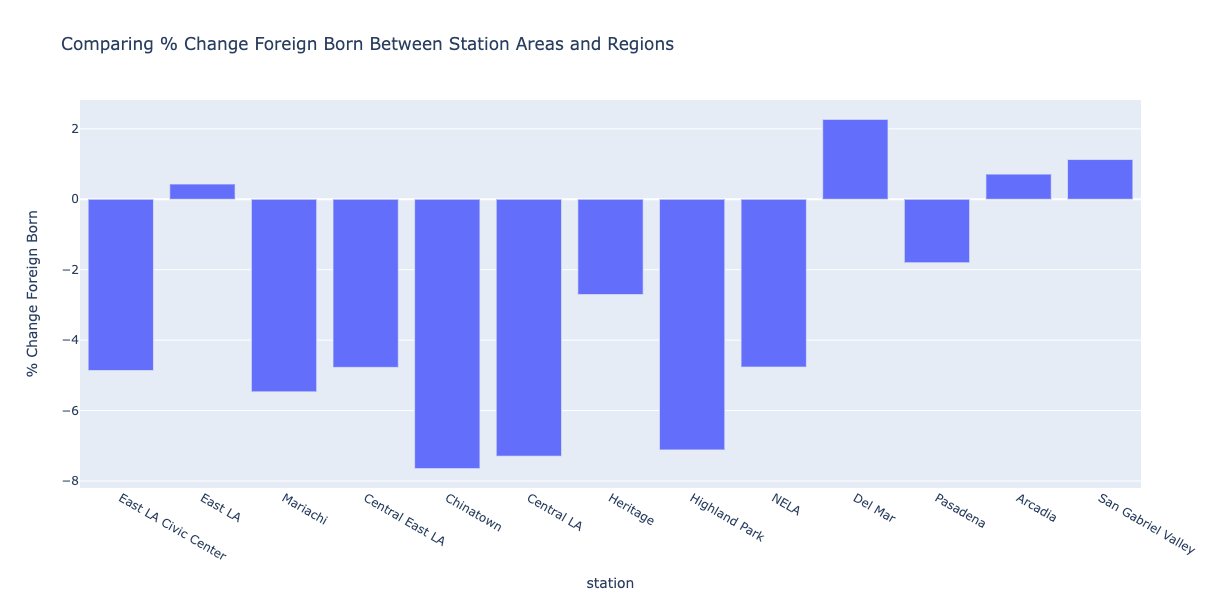

In [203]:
fig = px.bar(chart, x='station', y='% Change Foreign Born',
             barmode='group', 
             title='Comparing % Change Foreign Born Between Station Areas and Regions', 
             height=600)



fig.show()

In [95]:
df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 43 columns):
 #   Column                                          Non-Null Count  Dtype   
---  ------                                          --------------  -----   
 0   FIPS                                            213 non-null    object  
 1   Census Tract                                    213 non-null    object  
 2   11 Total Population                             213 non-null    float64 
 3   11 Total Foreign Born                           213 non-null    float64 
 4   11 Total Entered 2000 or later                  213 non-null    float64 
 5   11 Europe                                       213 non-null    float64 
 6   11 Europe Entered 2000 or later                 213 non-null    float64 
 7   11 Asia                                         213 non-null    float64 
 8   11 Asia Entered 2000 or later                   213 non-null    float64 
 9   11 Latin America        

## 7 charts - comparison bar chart w/ station in one color and region in another, country of origin on x axis, percent change foreign born on y

In [191]:
stations = ['East LA Civic Center', 'Mariachi', 'Chinatown', 'Heritage', 'Highland Park', 'Del Mar', 'Arcadia']

,Country of Origin,% of Total Foreign Born
0,Europe,0.055184
1,Asia,2.290129
2,Caribbean,0.013796
3,Mexico,30.340760
4,Other Central America,3.859419
5,South America,0.151756
6,Other Areas,0.000000


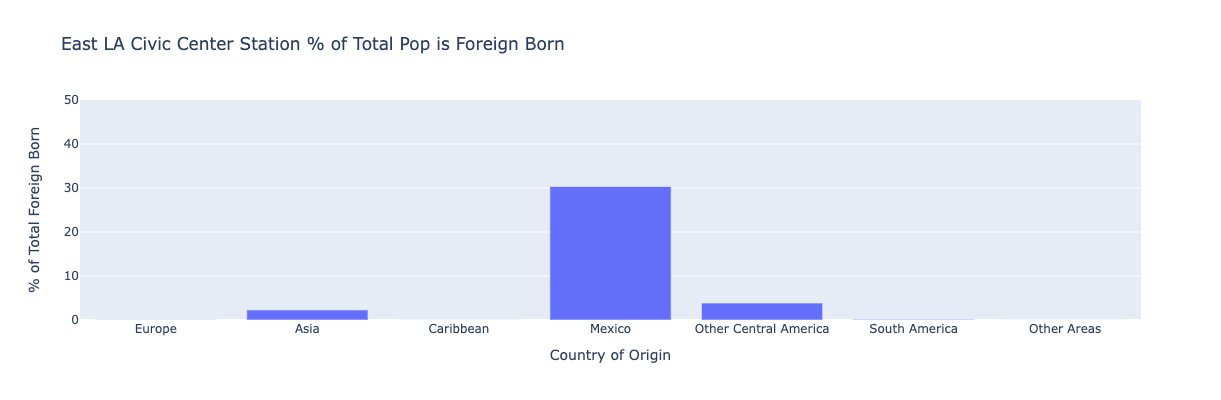

,Country of Origin,% of Total Foreign Born
0,Europe,0.245041
1,Asia,4.994166
2,Caribbean,0.283936
3,Mexico,30.715675
4,Other Central America,7.051731
5,South America,0.462855
6,Other Areas,0.054454


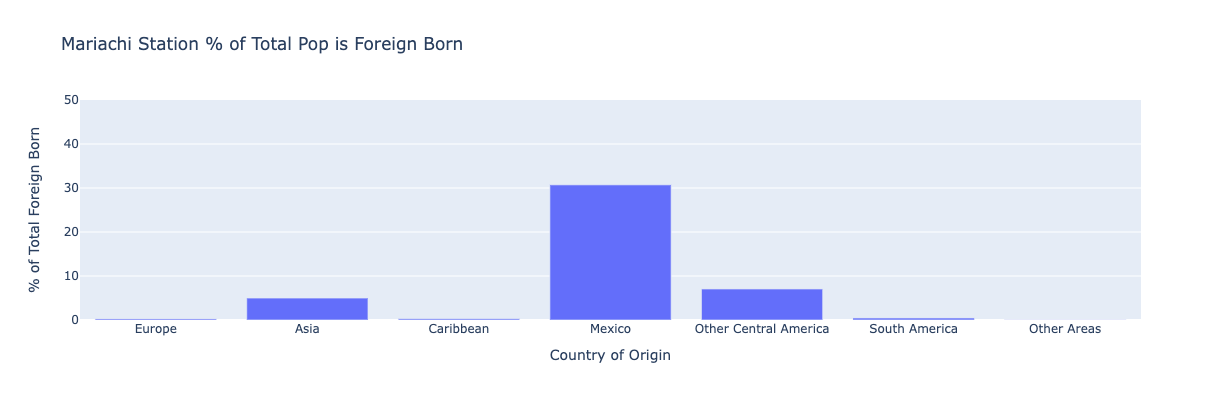

,Country of Origin,% of Total Foreign Born
0,Europe,1.044216
1,Asia,23.891880
2,Caribbean,0.076141
3,Mexico,7.554250
4,Other Central America,2.882471
5,South America,0.402458
6,Other Areas,0.000000


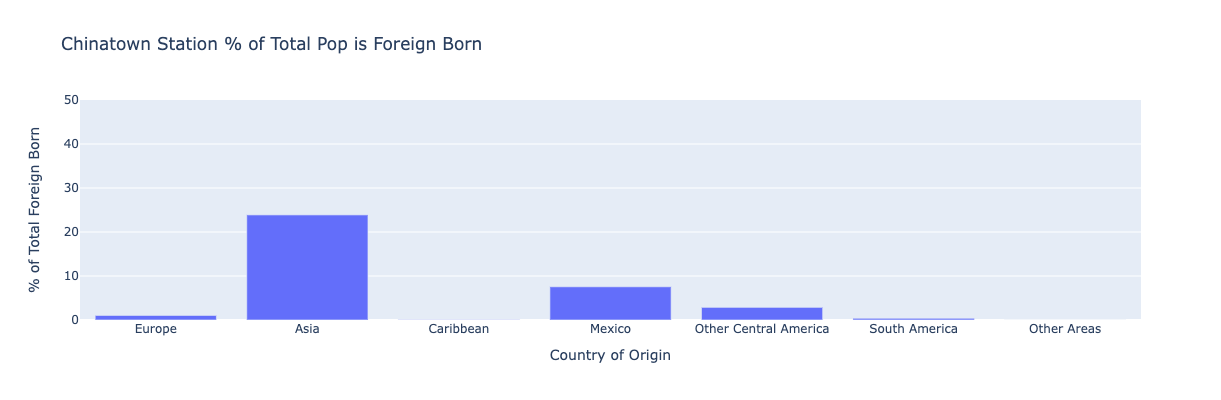

,Country of Origin,% of Total Foreign Born
0,Europe,0.833728
1,Asia,10.881099
2,Caribbean,0.052108
3,Mexico,20.213169
4,Other Central America,7.835149
5,South America,0.791094
6,Other Areas,0.222643


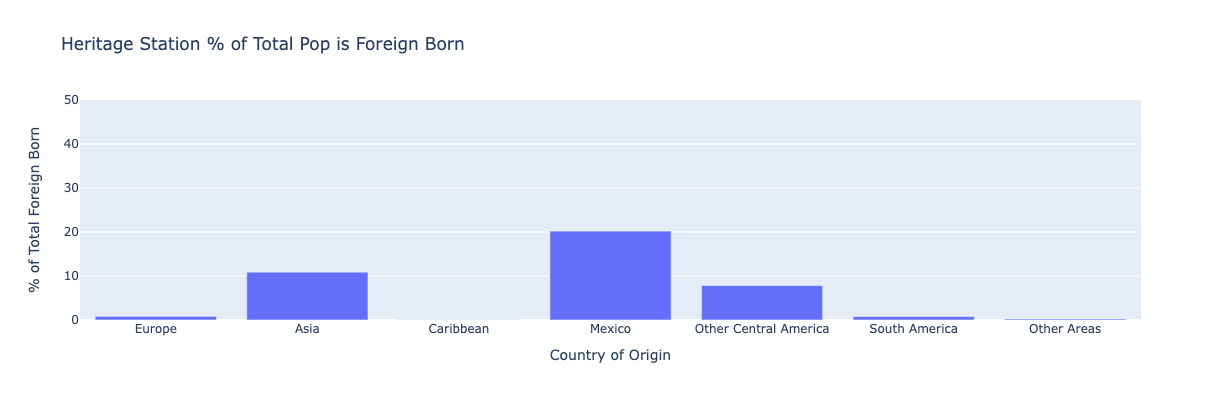

,Country of Origin,% of Total Foreign Born
0,Europe,0.692027
1,Asia,5.357901
2,Caribbean,0.526450
3,Mexico,19.113526
4,Other Central America,8.975121
5,South America,0.747219
6,Other Areas,0.352382


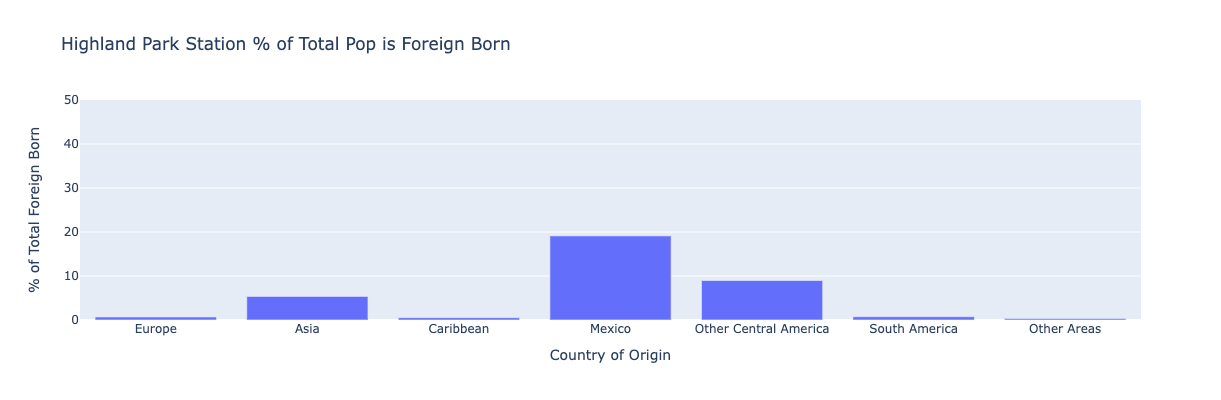

,Country of Origin,% of Total Foreign Born
0,Europe,2.719171
1,Asia,20.361950
2,Caribbean,0.054565
3,Mexico,1.509640
4,Other Central America,1.345944
5,South America,0.563841
6,Other Areas,0.909422


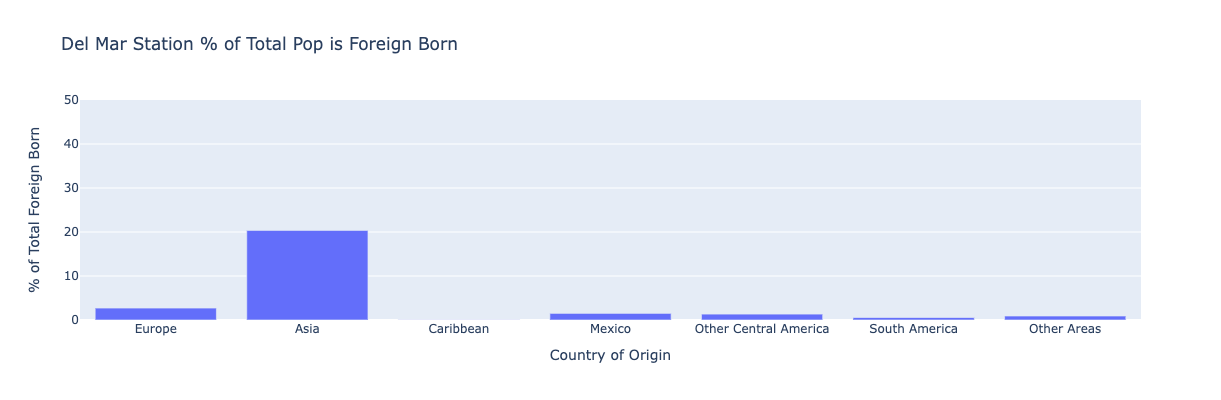

,Country of Origin,% of Total Foreign Born
0,Europe,2.034268
1,Asia,45.523968
2,Caribbean,0.346531
3,Mexico,1.456716
4,Other Central America,0.044921
5,South America,0.686646
6,Other Areas,0.352949


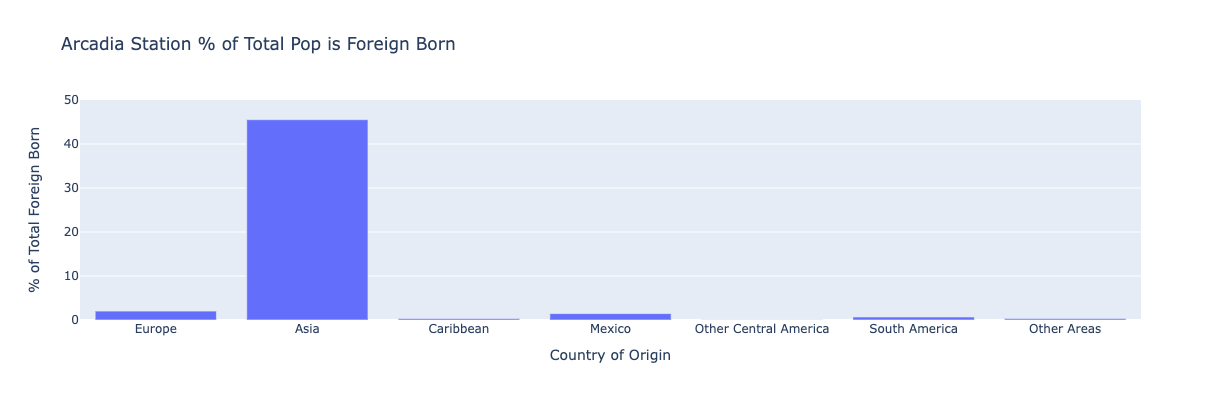

In [194]:
def stn_chart_country(station = 'East LA Civic Center'):

    gdf = df[df["station"].isin([station])]

    # Creating our summation row, since we're not breaking it down by census tract
    gdf = gdf.append(gdf.sum(numeric_only=True), ignore_index=True)

    # Keeping only summation row
    gdf = gdf.iloc[-1:]
    
    gdf = gdf.drop(columns=['FIPS', 'Census Tract'], axis=1)

    gdf['Europe'] = gdf['19 Europe']/gdf['19 Total Population']*100
    gdf['Asia'] = gdf['19 Asia']/gdf['19 Total Population']*100
    gdf['Caribbean'] = gdf['19 Caribbean']/gdf['19 Total Population']*100
    gdf['Mexico'] = gdf['19 Mexico']/gdf['19 Total Population']*100
    gdf['Other Central America'] = gdf['19 Other Central America']/gdf['19 Total Population']*100
    gdf['South America'] = gdf['19 South America']/gdf['19 Total Population']*100
    gdf['Other Areas'] = gdf['19 Other Areas Entered 2010 or later']/gdf['19 Total Population']*100
    
    ctk = ['Europe',
           'Asia',
           'Caribbean',
           'Mexico',
           'Other Central America',
           'South America',
           'Other Areas']
    
    gdf = gdf[ctk]
    
    # Flipping rows and columns
    gdf = gdf.transpose()
    
    # Reseting index
    gdf = gdf.reset_index()
    
    # Renaming columns
    gdf.columns = ['Country of Origin', '% of Total Foreign Born']
    
    display(gdf)
    
    fig = px.bar(gdf, x='Country of Origin', y='% of Total Foreign Born',
              barmode='group',
              title=station + " Station % of Total Pop is Foreign Born", 
              height=400)
    
    fig.update_yaxes(range=[0, 50])
   
    fig.show()

for station in stations:
    stn_chart_country(station = station)